In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

In [ ]:
# chuyển từ xlxs sang csv
excel = pd.read_excel('/content/Iris dataset.xlsx')
excel.to_csv("/content/Iris dataset.csv", index=False)

In [ ]:
# đọc csv
pd.read_csv('/content/Iris dataset.csv')

,Dataset order,Sepal length,Sepal width,Petal length,Petal width,Species
0,1,5.1,3.5,1.4,0.2,I. setosa
1,2,4.9,3.0,1.4,0.2,I. setosa
2,3,4.7,3.2,1.3,0.2,I. setosa
3,4,4.6,3.1,1.5,0.2,I. setosa
4,5,5.0,3.6,1.4,0.3,I. setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,I. virginica
146,147,6.3,2.5,5.0,1.9,I. virginica
147,148,6.5,3.0,5.2,2.0,I. virginica
148,149,6.2,3.4,5.4,2.3,I. virginica


In [ ]:
# Các class được gán nhãn là 0, 1, và 2
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print('Number of classes: %d' %len(np.unique(iris_y)))
print('Number of data points: %d' %len(iris_y))


X0 = iris_X[iris_y == 0,:]
print('\nSamples from class 0:\n', X0[:5,:])

X1 = iris_X[iris_y == 1,:]
print('\nSamples from class 1:\n', X1[:5,:])

X2 = iris_X[iris_y == 2,:]
print('\nSamples from class 2:\n', X2[:5,:])

Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


In [ ]:
# Tách training và test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)
print("Training size: ", len(y_train))
print("Test size    : ", len(y_test))

Training size:  100
Test size    :  50


**K = 1**

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Print results for 20 test data points:")
print("Predicted labels: ", y_pred[20:40])
print("Ground truth    : ", y_test[20:40])  # ground truth chính là nhãn/label/đầu ra thực sự của các điểm trong test data

Print results for 20 test data points:
Predicted labels:  [2 2 1 1 1 1 2 2 2 0 1 2 1 2 2 2 0 1 0 0]
Ground truth    :  [2 2 1 1 1 1 2 2 2 0 2 2 1 2 2 2 0 1 0 0]


**Đánh giá độ chính xác của thuật toán KNN classifier**

**Bảng so sánh 3 cách tính khoảng cách**

In [ ]:
data = {
    'Giá trị p': ['1', '2', '∞'],
    'Tên khoảng cách': ['Manhattan (L1)', 'Euclidean (L2)', 'Chebyshev (L∞)'],
    'Công thức': [
        '∑ |xi - yi|',
        '√(∑ (xi - yi)²)',
        'max(|xi - yi|)'
    ]
}

df_distances = pd.DataFrame(data)
df_distances

,Giá trị p,Tên khoảng cách,Công thức
0,1,Manhattan (L1),∑ |xi - yi|
1,2,Euclidean (L2),√(∑ (xi - yi)²)
2,∞,Chebyshev (L∞),max(|xi - yi|)


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 92.00 %


Kỹ thuật dựa vào đa số = major voting

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN with major voting: 98.00 %


In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN with manhattan distance: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN with manhattan distance: 94.00 %


In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (1/distance weights): 94.00 %


Ngoài 2 cách trên thì còn 1 cách khác mà sklearn cung cấp (khá phổ biến)

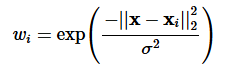

In [ ]:
def myweight(distance):
  sigma2= .5      # có thể thay đổi số này
  return np.exp(-distance**2/sigma2)

clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = myweight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN (customized weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (customized weights): 94.00 %


**Vẽ biểu đồ**

In [ ]:
import seaborn as sns

In [ ]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df["target"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


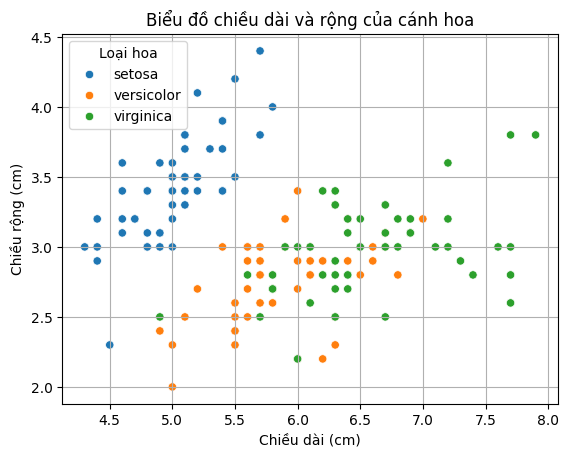

In [ ]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="target")

plt.title('Biểu đồ chiều dài và rộng của cánh hoa')
plt.xlabel('Chiều dài (cm)')
plt.ylabel('Chiều rộng (cm)')
plt.legend(title='Loại hoa', loc='upper left')
plt.grid(True)
plt.show()